In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lng
import subprocess
import os
import struct
import time

# DON'T TOUCH ME
### I DOWNLOAD STUFF

In [2]:
## DON'T RUN ME MORE THAN ONCE
# downloading and formatting the data
# training set images (9912422 bytes), training set labels, test images, test labels
urls = ['http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']
for url in urls:
    print(url)
    subprocess.run(['wget', url])
print('done')

http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
done


# DON'T TOUCH ME EITHER
### I UNZIP IT

In [4]:
## ALSO ONLY RUN ME ONCE
files = []
path = '/Users/audrey_der/Documents/Spring 2020/EECS260/hw1'
for i,file in enumerate(os.listdir(path)):
    if file.endswith(".gz"):
        print(file)
        files.append(os.path.basename(file))
        subprocess.run(['gzip', '-d', file])

t10k-images-idx3-ubyte.gz
train-images-idx3-ubyte.gz
train-labels-idx1-ubyte.gz
t10k-labels-idx1-ubyte.gz


# TRAINING STUFF: START HERE

In [91]:
# reading images
# the first four "elements" are 32 bit ints
with open('train-images-idx3-ubyte', 'rb') as f:
    magic_num, size = struct.unpack(">II", f.read(8))
    rows, cols = struct.unpack(">II", f.read(8))
    d = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    d = d.reshape((size, rows, cols))
    x = d.reshape((size, rows*cols)) # (# images , 1 x 784) # use me
    
with open('train-labels-idx1-ubyte','rb') as f:
    magic_num, size = struct.unpack(">II", f.read(8))
    y = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))

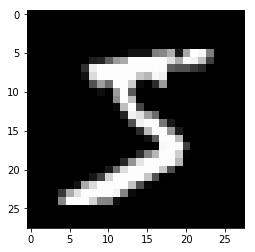

<class 'numpy.ndarray'>
50000
(50000, 784)


In [92]:
# reading labels
plt.imshow(d[0,:,:], cmap='gray')
plt.show()
print(type(x))
x = x[:50000,:]
print(len(x))

print(x.shape)

In [93]:
# one hot encoding
Y_ohe = [] # may need to make np arr
for i in range(0,10):
    n = np.zeros(10)
    n[i] = 1
    Y_ohe.append(n)
Y_all = []
for e in range(50000): # as said in Slack, first 50k examples
    Y_all.append(Y_ohe[y[e]-1])
Y_all = np.array(Y_all)
print(Y_all.shape)

(50000, 10)


In [107]:
# time to do minibatch sgd
def minibatch_SGD(B, itrs, eta): # batch size, # iters, learning rate
    W = np.zeros((784,10))
    for i in range(itrs):
        r = np.random.choice(len(x), size=B, replace=False)
        X = x[r,:]
        Y = Y_all[r,:]
        # compute gradient; steps 2 and 3
        gradient = np.true_divide(np.subtract(np.matmul(X.T,X@W), np.matmul(X.T,Y)), B)
        W = W - eta*gradient # new weights
    loss = mse(W.T@X.T,Y)
    return W, loss

In [132]:
print(Y_all)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


# CAUTION: I RESET VARIABLES YOU NEED LATER

In [190]:
batches = [1, 10, 100, 1000]
etas = [10**i for i in range(-12,-7)]
itrs = [1, 10, 100, 1000]
L = [] # loss
TT = []
weights_at = []
w, l = minibatch_SGD(10,10,0.001)
print(etas)
def mse(y_hat,y):
    return 0.5*np.square(lng.norm(np.subtract(y, y_hat.T)))

[1e-12, 1e-11, 1e-10, 1e-09, 1e-08]


# CAUTION: I TRAIN THE THING

In [191]:
for b in batches:
    print("Training batch size: {}".format(b))
    l_e = []
    ttime_e = []
    wa_e = []
    for e in etas:
        print("Training Eta value: {}".format(e))
        l_i = []
        ttime_i = []
        wa_i = []
        for i in itrs:
            print("Num iters: {}".format(i))
            start_time = time.time()
            W, loss = minibatch_SGD(b,i,e)
            train_time = time.time() - start_time
            l_i.append(loss)
            ttime_i.append(train_time)
            wa_i.append(W)
        l_e.append(l_i)
        ttime_e.append(train_time)
        wa_e.append(wa_i)
        print("-  -  -  -  -  -")
    L.append(l_e) # loss at
    TT.append(ttime_e) # training time
    weights_at.append(wa_e) # weights at
    print("################")

Training batch size: 1
Training Eta value: 1e-12
Num iters: 1
Num iters: 10
Num iters: 100
Num iters: 1000
-  -  -  -  -  -
Training Eta value: 1e-11
Num iters: 1
Num iters: 10
Num iters: 100
Num iters: 1000
-  -  -  -  -  -
Training Eta value: 1e-10
Num iters: 1
Num iters: 10
Num iters: 100
Num iters: 1000
-  -  -  -  -  -
Training Eta value: 1e-09
Num iters: 1
Num iters: 10
Num iters: 100
Num iters: 1000
-  -  -  -  -  -
Training Eta value: 1e-08
Num iters: 1
Num iters: 10
Num iters: 100
Num iters: 1000
-  -  -  -  -  -
################
Training batch size: 10
Training Eta value: 1e-12
Num iters: 1
Num iters: 10
Num iters: 100
Num iters: 1000
-  -  -  -  -  -
Training Eta value: 1e-11
Num iters: 1
Num iters: 10
Num iters: 100
Num iters: 1000
-  -  -  -  -  -
Training Eta value: 1e-10
Num iters: 1
Num iters: 10
Num iters: 100
Num iters: 1000
-  -  -  -  -  -
Training Eta value: 1e-09
Num iters: 1
Num iters: 10
Num iters: 100
Num iters: 1000
-  -  -  -  -  -
Training Eta value: 1e-08
N

In [192]:
print(L)

[[[0.49999664107264125, 0.4999938163712769, 0.4999592782524918, 0.4996806240496229], [0.4999572776826372, 0.49994695215525375, 0.499713296714473, 0.49833316421871343], [0.4996144498531275, 0.49755772989455205, 0.49728983799393095, 0.4780049118674452], [0.49576032672159626, 0.4930929201498376, 0.45156025908951675, 0.3545491724954751], [0.45268708634635524, 0.3322676250165475, 0.2516544320390989, 0.2507127684418781]], [[4.999989874625794, 4.999965782082201, 4.999705481311178, 4.997164139364116], [4.999915544479201, 4.9996212016659465, 4.996495127766161, 4.969816292152446], [4.999370944369311, 4.996748968361227, 4.971296763347879, 4.7636607260541215], [4.992093230708523, 4.969203046309488, 4.758763523241026, 3.9092978257215214], [4.9088249585221835, 4.712344297901206, 3.822780469864973, 3.9694037532842303]], [[49.999965753262146, 49.99969569866757, 49.996812780254366, 49.97042791418899], [49.9996492413564, 49.997150302323654, 49.97186581245521, 49.68445461371209], [49.9961264536201, 49.96

(4, 5, 4)


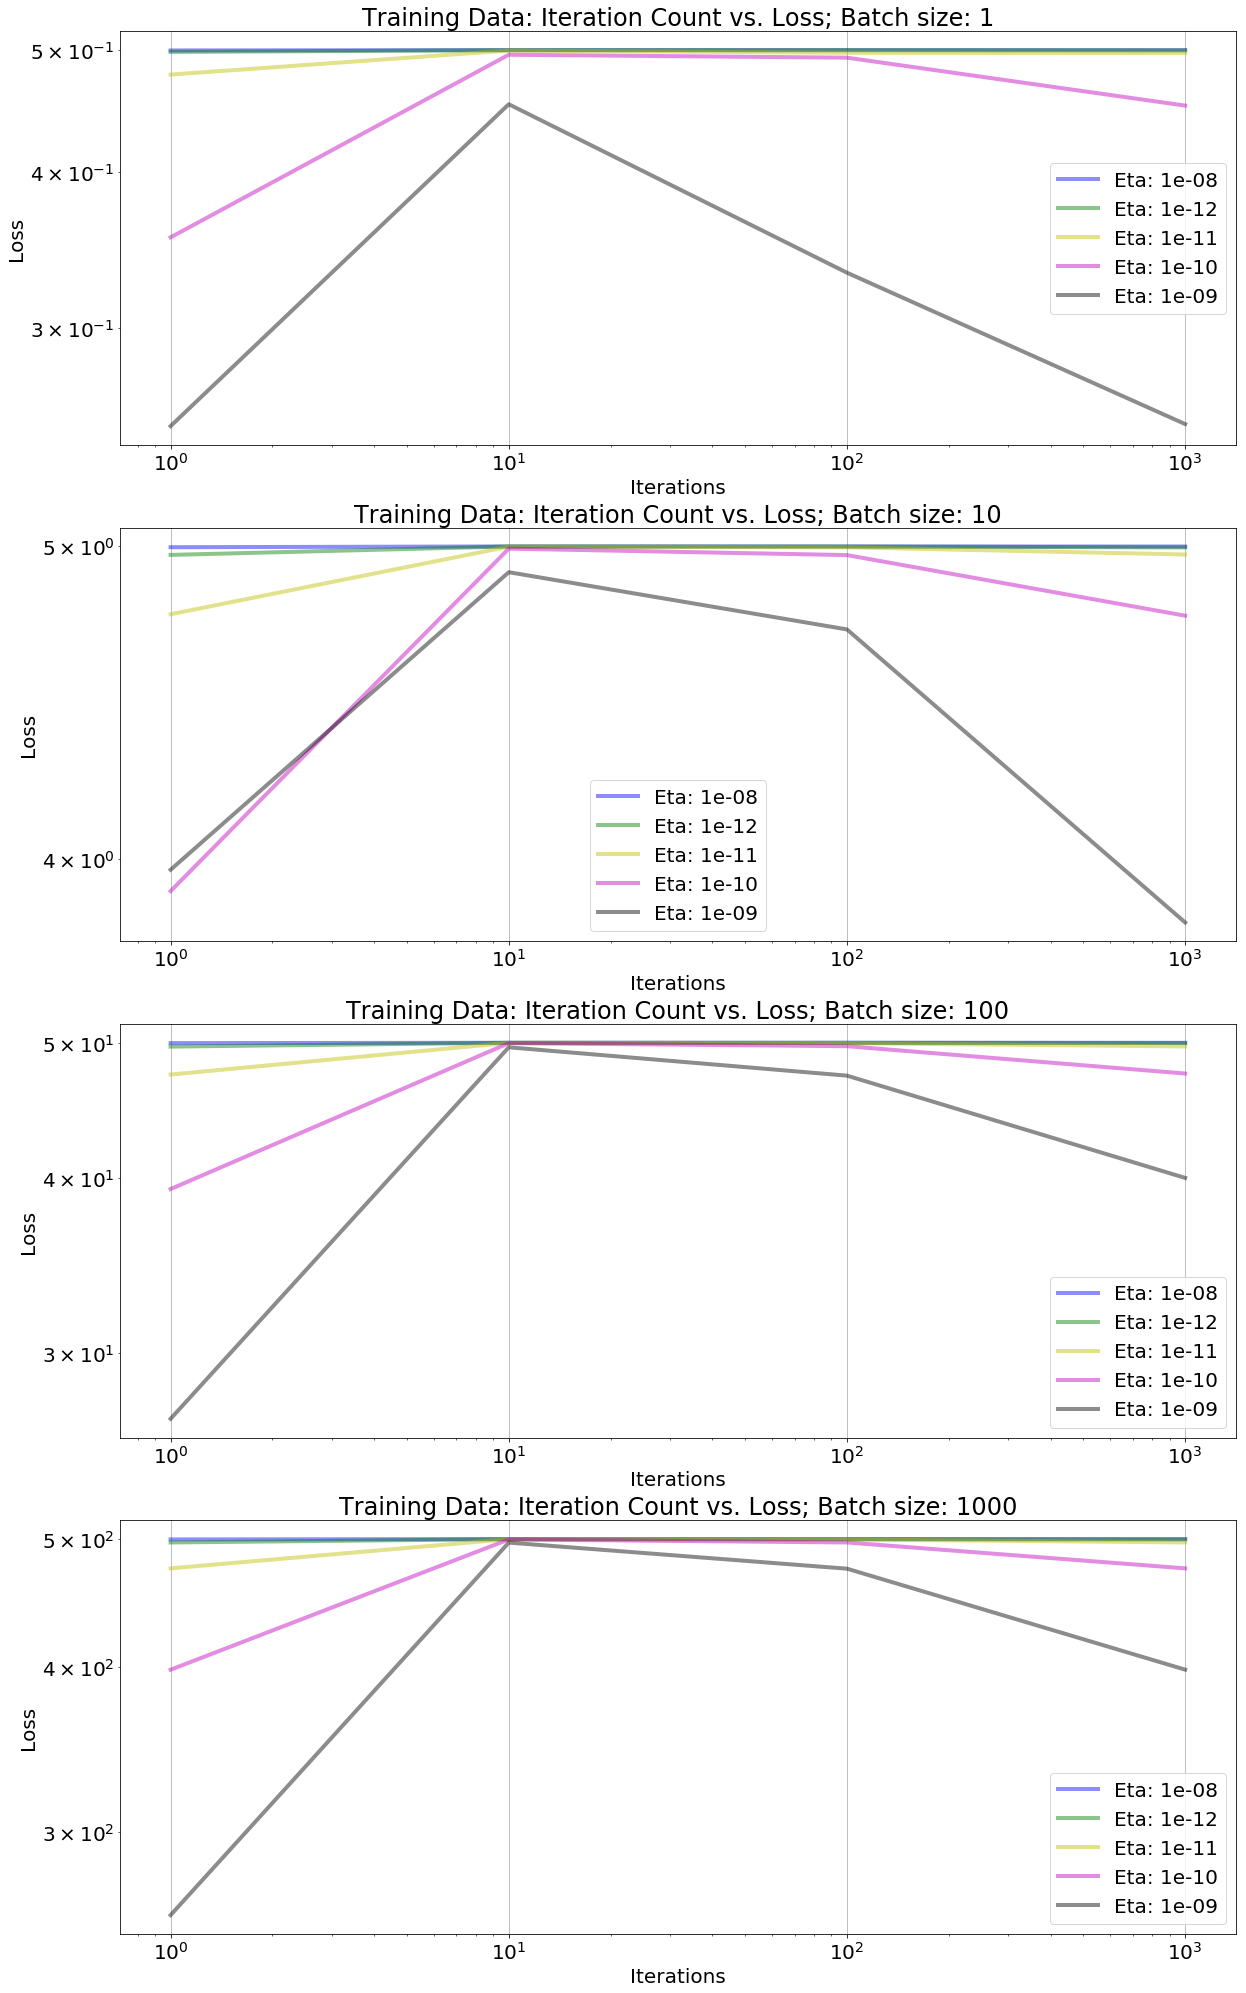

In [199]:
# L is loss, TT is training time
# Plot the progress of training loss (y-axis) as a function of the iteration counter t (x-axis)
# Report how long the training takes (in seconds)
# Plot the progress of the test accuracy (y-axis) as a function of the iteration counter t (x-axis)

L = np.array(L)
f, axs = plt.subplots(len(L),1,figsize=(20,35))
plt.rcParams.update({'font.size': 20})
colors = ['r', 'b', 'g', 'y', 'm', 'k']
x_plot = [1,10,100,1000]
print(L.shape)

for b in range(len(batches)): # 4
    for e in range(len(etas)): # 7
        for k in range(4):
            L[b,e,k] = np.sum(L[b,e,k])

for b in range(len(batches)): # batch
    i += 1
    plt.subplot(4, 1, b+1) # one subplot per batch size
    j = 0
    for e in range(len(etas)): # eta value
        j += 1
        l_plot = []
        for k in range(4):
            temp = np.sum(L[b,e,k-1])
            l_plot.append(temp) # y value for that eta
        plt.semilogx(x_plot, l_plot, alpha=0.45, color=colors[j], linewidth=4, label="Eta: {}".format(etas[e-1])) # one line per eta
        plt.yscale('log')
        plt.grid(True, axis='both', linestyle='-')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Training Data: Iteration Count vs. Loss; Batch size: {}'.format(batches[b], etas[e]))
        plt.legend()
# plt.savefig('part3',dpi=300)
plt.show()

# TEST DATA: START HERE

In [ ]:
# reading images
# the first four "elements" are 32 bit ints
with open('train-images-idx3-ubyte', 'rb') as f:
    magic_num, size = struct.unpack(">II", f.read(8))
    rows, cols = struct.unpack(">II", f.read(8))
    d = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    d = d.reshape((size, rows, cols))
    x = d.reshape((size, rows*cols)) # (# images , 1 x 784) # use me
    
with open('train-labels-idx1-ubyte','rb') as f:
    magic_num, size = struct.unpack(">II", f.read(8))
    y = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))

In [204]:
weights_at = np.array(weights_at)
print(weights_at.shape)
for b in range(len(batches)):
    for e in range(len(etas)):
        for i in range(len(itrs)):
            W = weights_at[b,e,i] # 784 x 10
            y_hat = W.T@
            

(4, 5, 4, 784, 10)
(784, 10)
